<a href="https://colab.research.google.com/github/rakib-03/Numeric-Banlga-Sign/blob/main/SL_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#inserting dependencies

In [ ]:
import cv2
import os
import glob
import numpy as np
import pandas as pd
from imutils import paths
from skimage import img_as_ubyte  #Convert an image to unsigned byte format, with values in [0, 255].
from skimage.filters import gaussian, sobel
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.5/593.5 kB 9.8 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
%cd /content/drive/MyDrive/numeric_sign_detection

/content/drive/.shortcut-targets-by-id/1Ot-5XMgHmo5HBtU84-tHwQn9RYyDZw-o/numeric_sign_detection


In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1Ot-5XMgHmo5HBtU84-tHwQn9RYyDZw-o/numeric_sign_detection


**Training on YOLOV8**

In [ ]:
%cd /content/drive/MyDrive/numeric_sign_detection 
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=35 imgsz=640 plots=True show=True visualize=True classes= [0,1,2,3,4,5,6,7,8,9] 

/content/drive/.shortcut-targets-by-id/1Ot-5XMgHmo5HBtU84-tHwQn9RYyDZw-o/numeric_sign_detection
Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=35, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=True, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=True, augment=False, agnostic_nms=False, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [ ]:
%cd /content/drive/MyDrive/numeric_sign_detection
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=70 imgsz=640 plots=True

/content/drive/MyDrive/numeric_sign_detection
Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimi

In [ ]:
%cd /content/drive/MyDrive/numeric_sign_detection
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=100 imgsz=640 plots=True

/content/drive/.shortcut-targets-by-id/1Ot-5XMgHmo5HBtU84-tHwQn9RYyDZw-o/numeric_sign_detection
Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

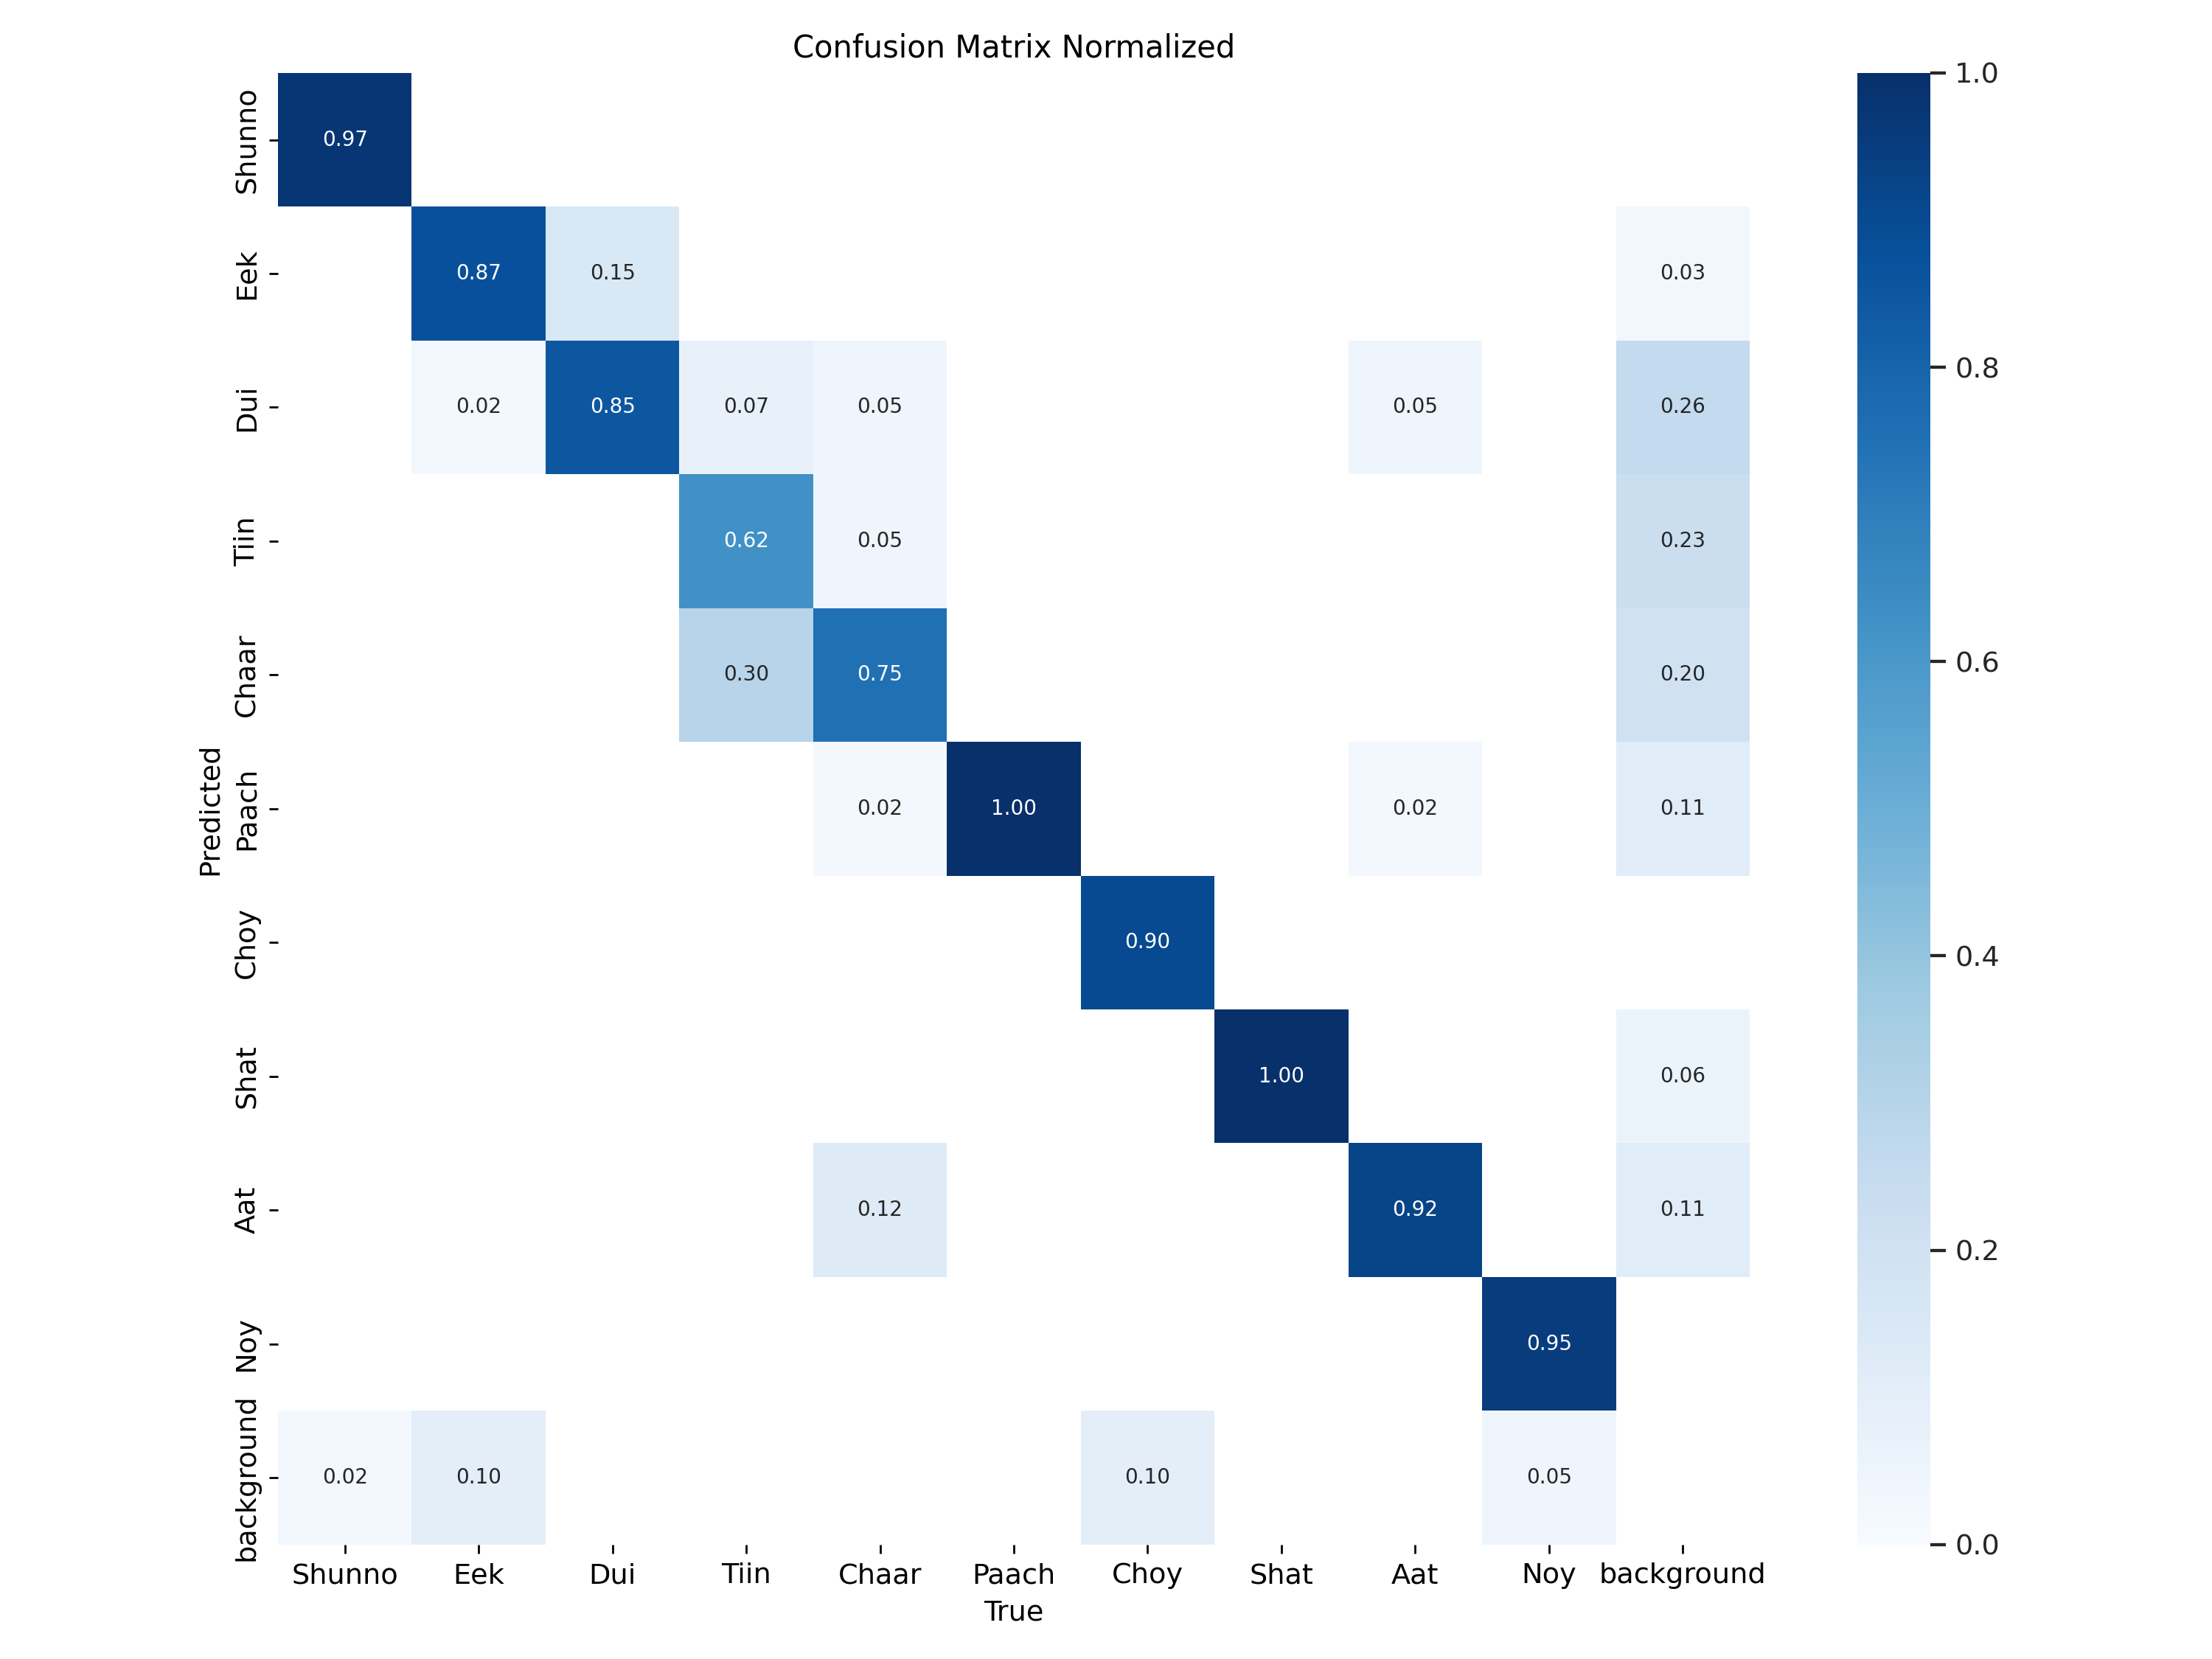

In [ ]:
Image(filename='runs/detect/train5/confusion_matrix_normalized.png', width=600)

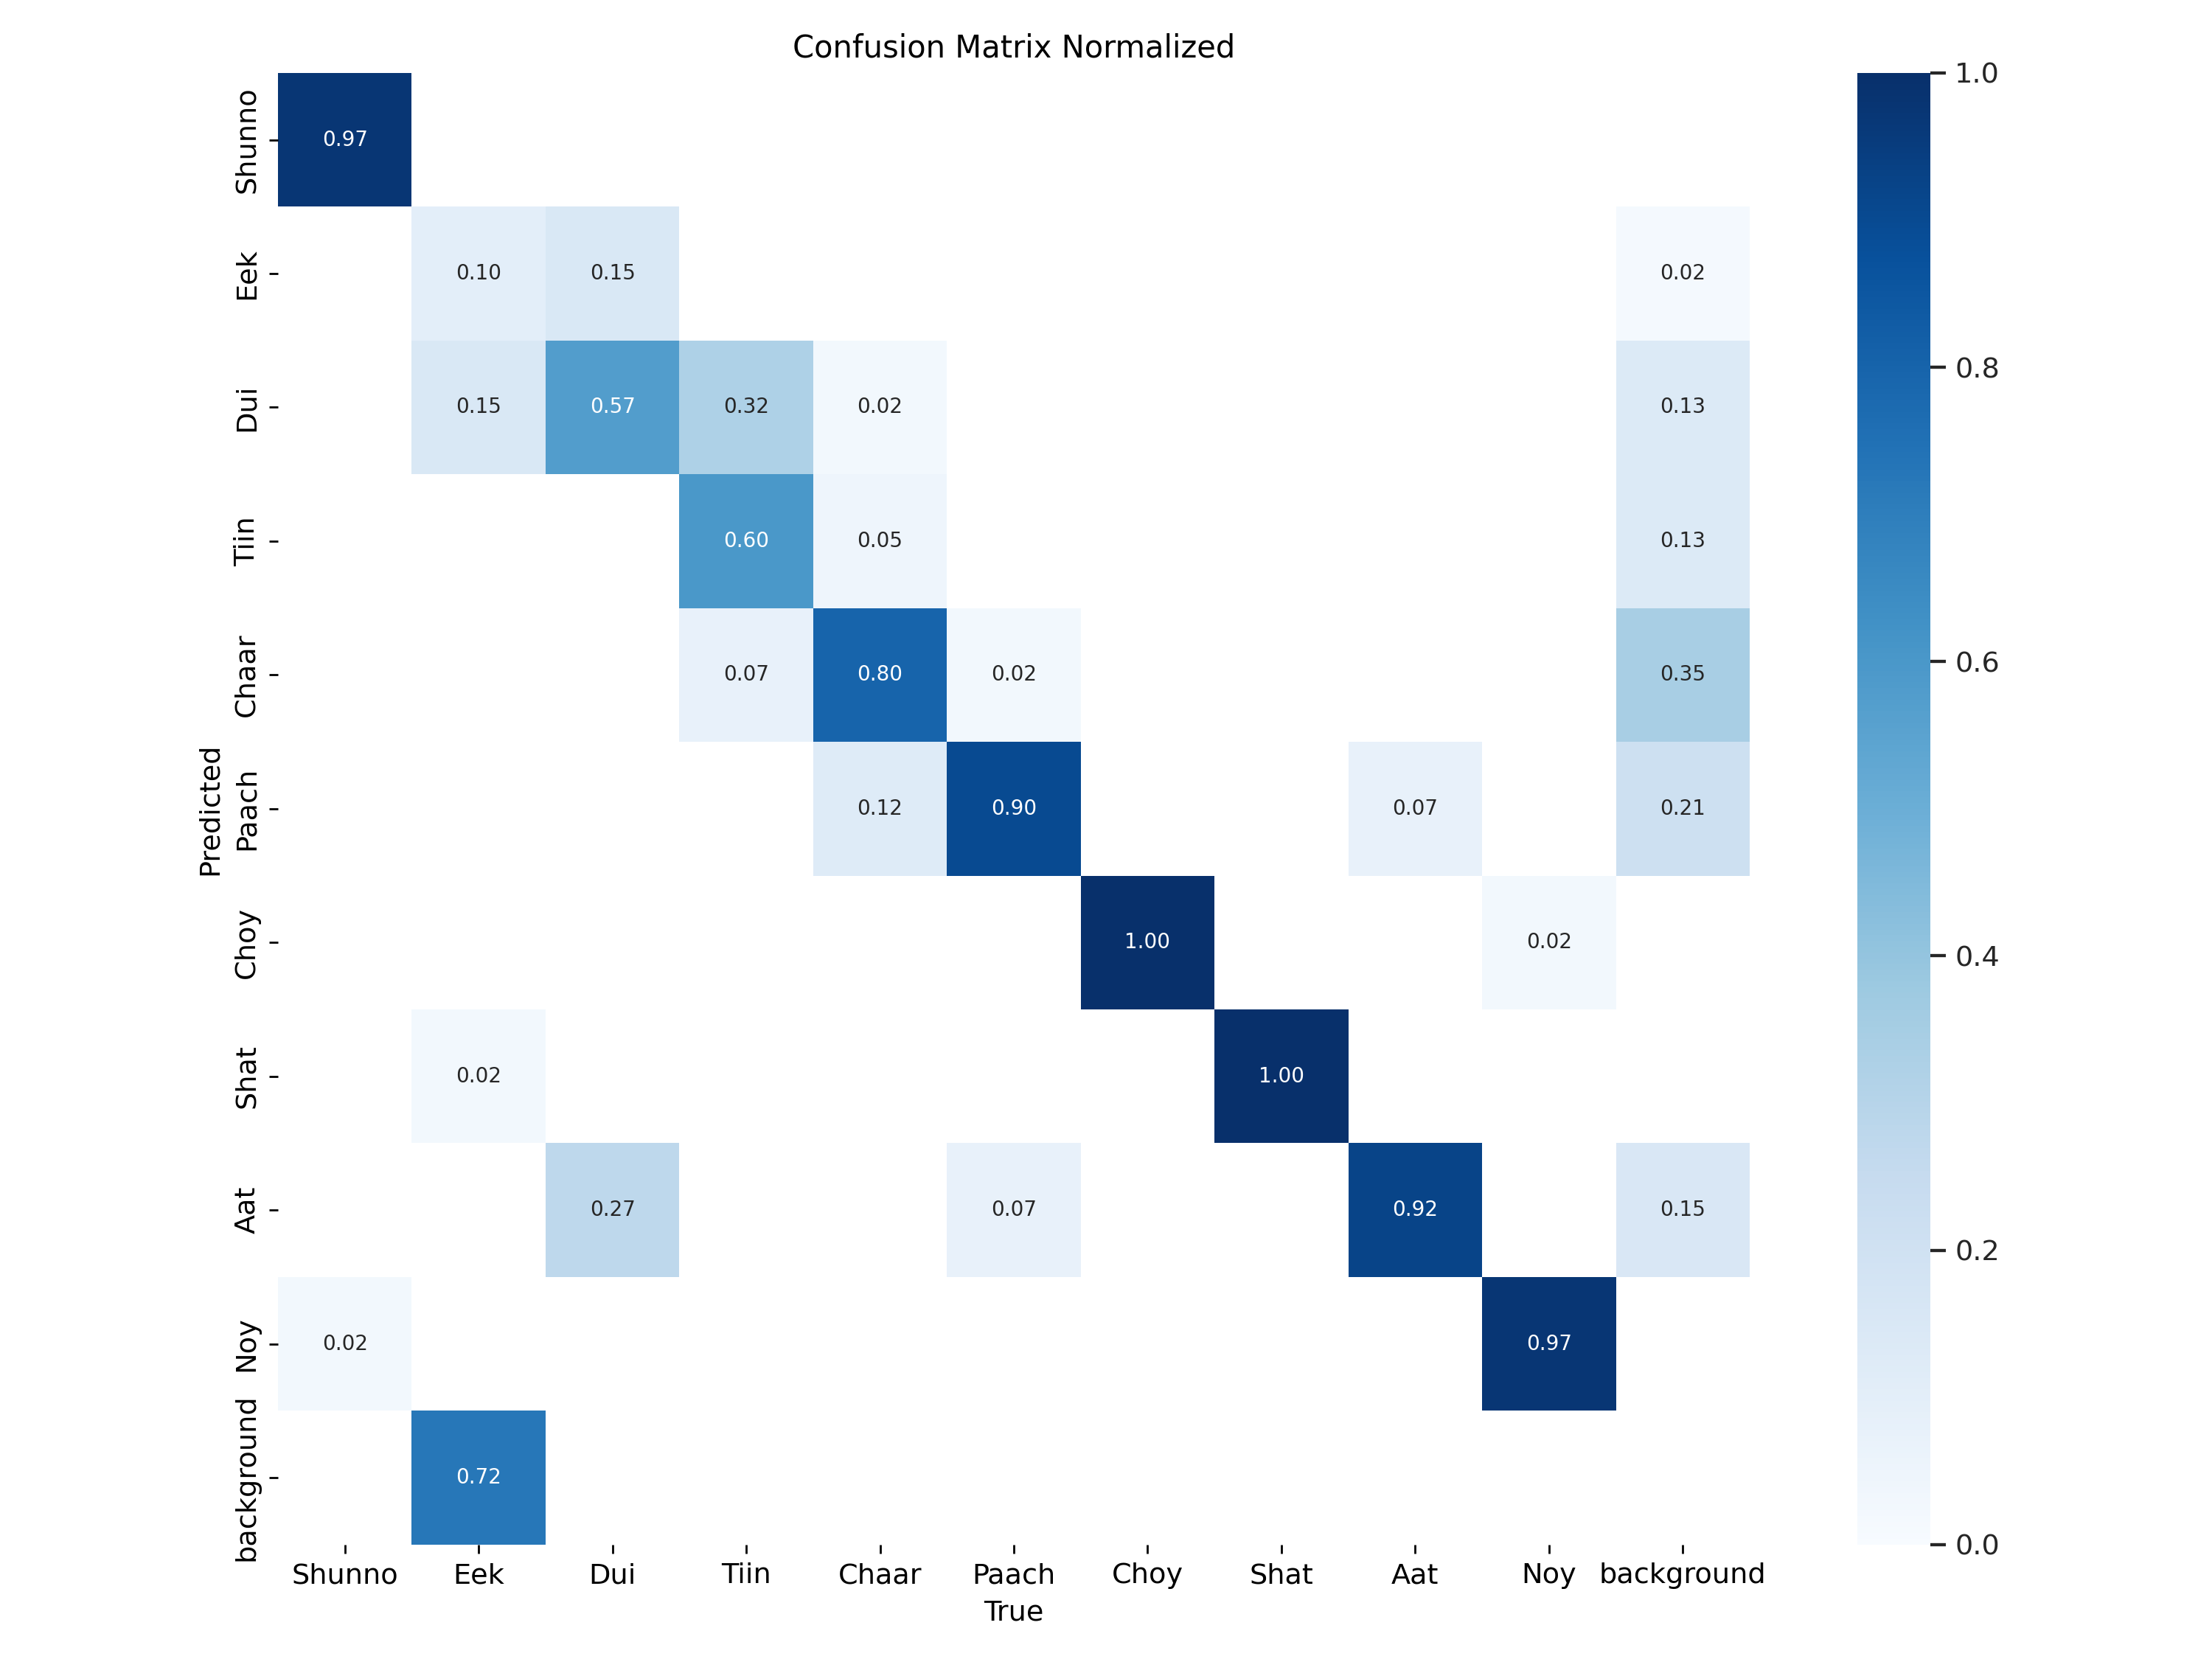

In [ ]:
Image(filename='runs/detect/train3/confusion_matrix_normalized.png', width=600)

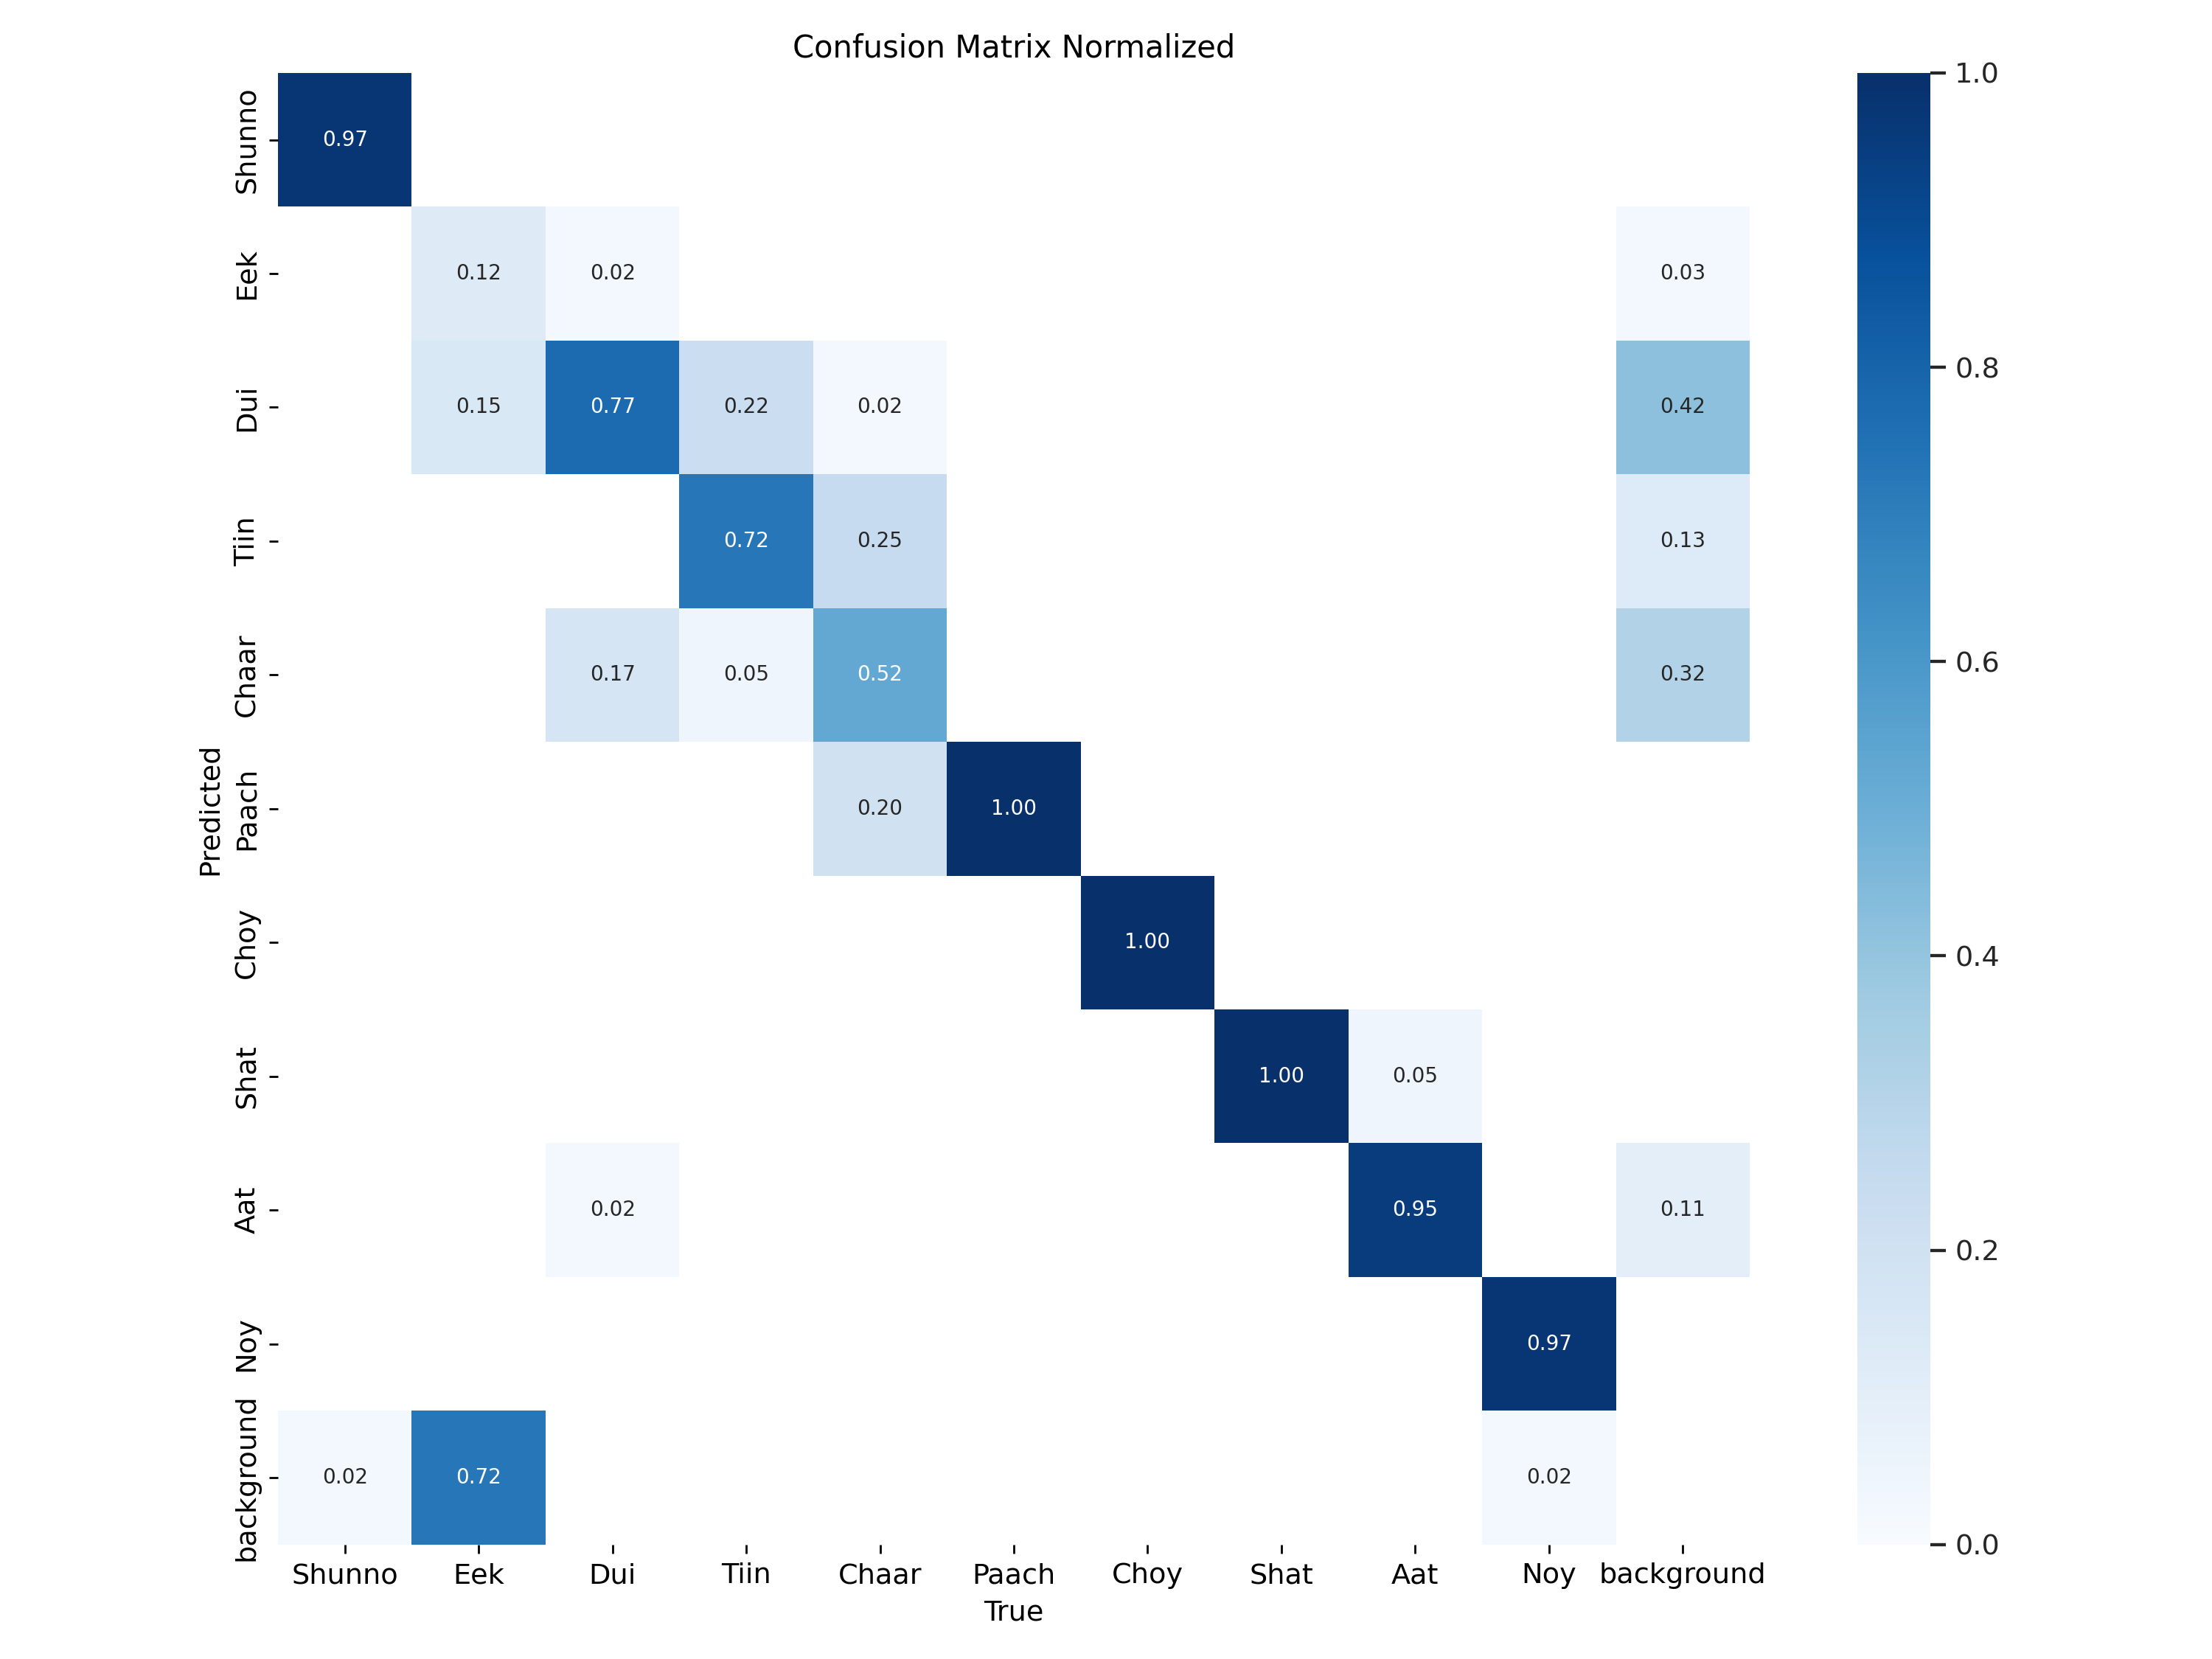

In [ ]:
Image(filename='runs/detect/train4/confusion_matrix_normalized.png', width=600)

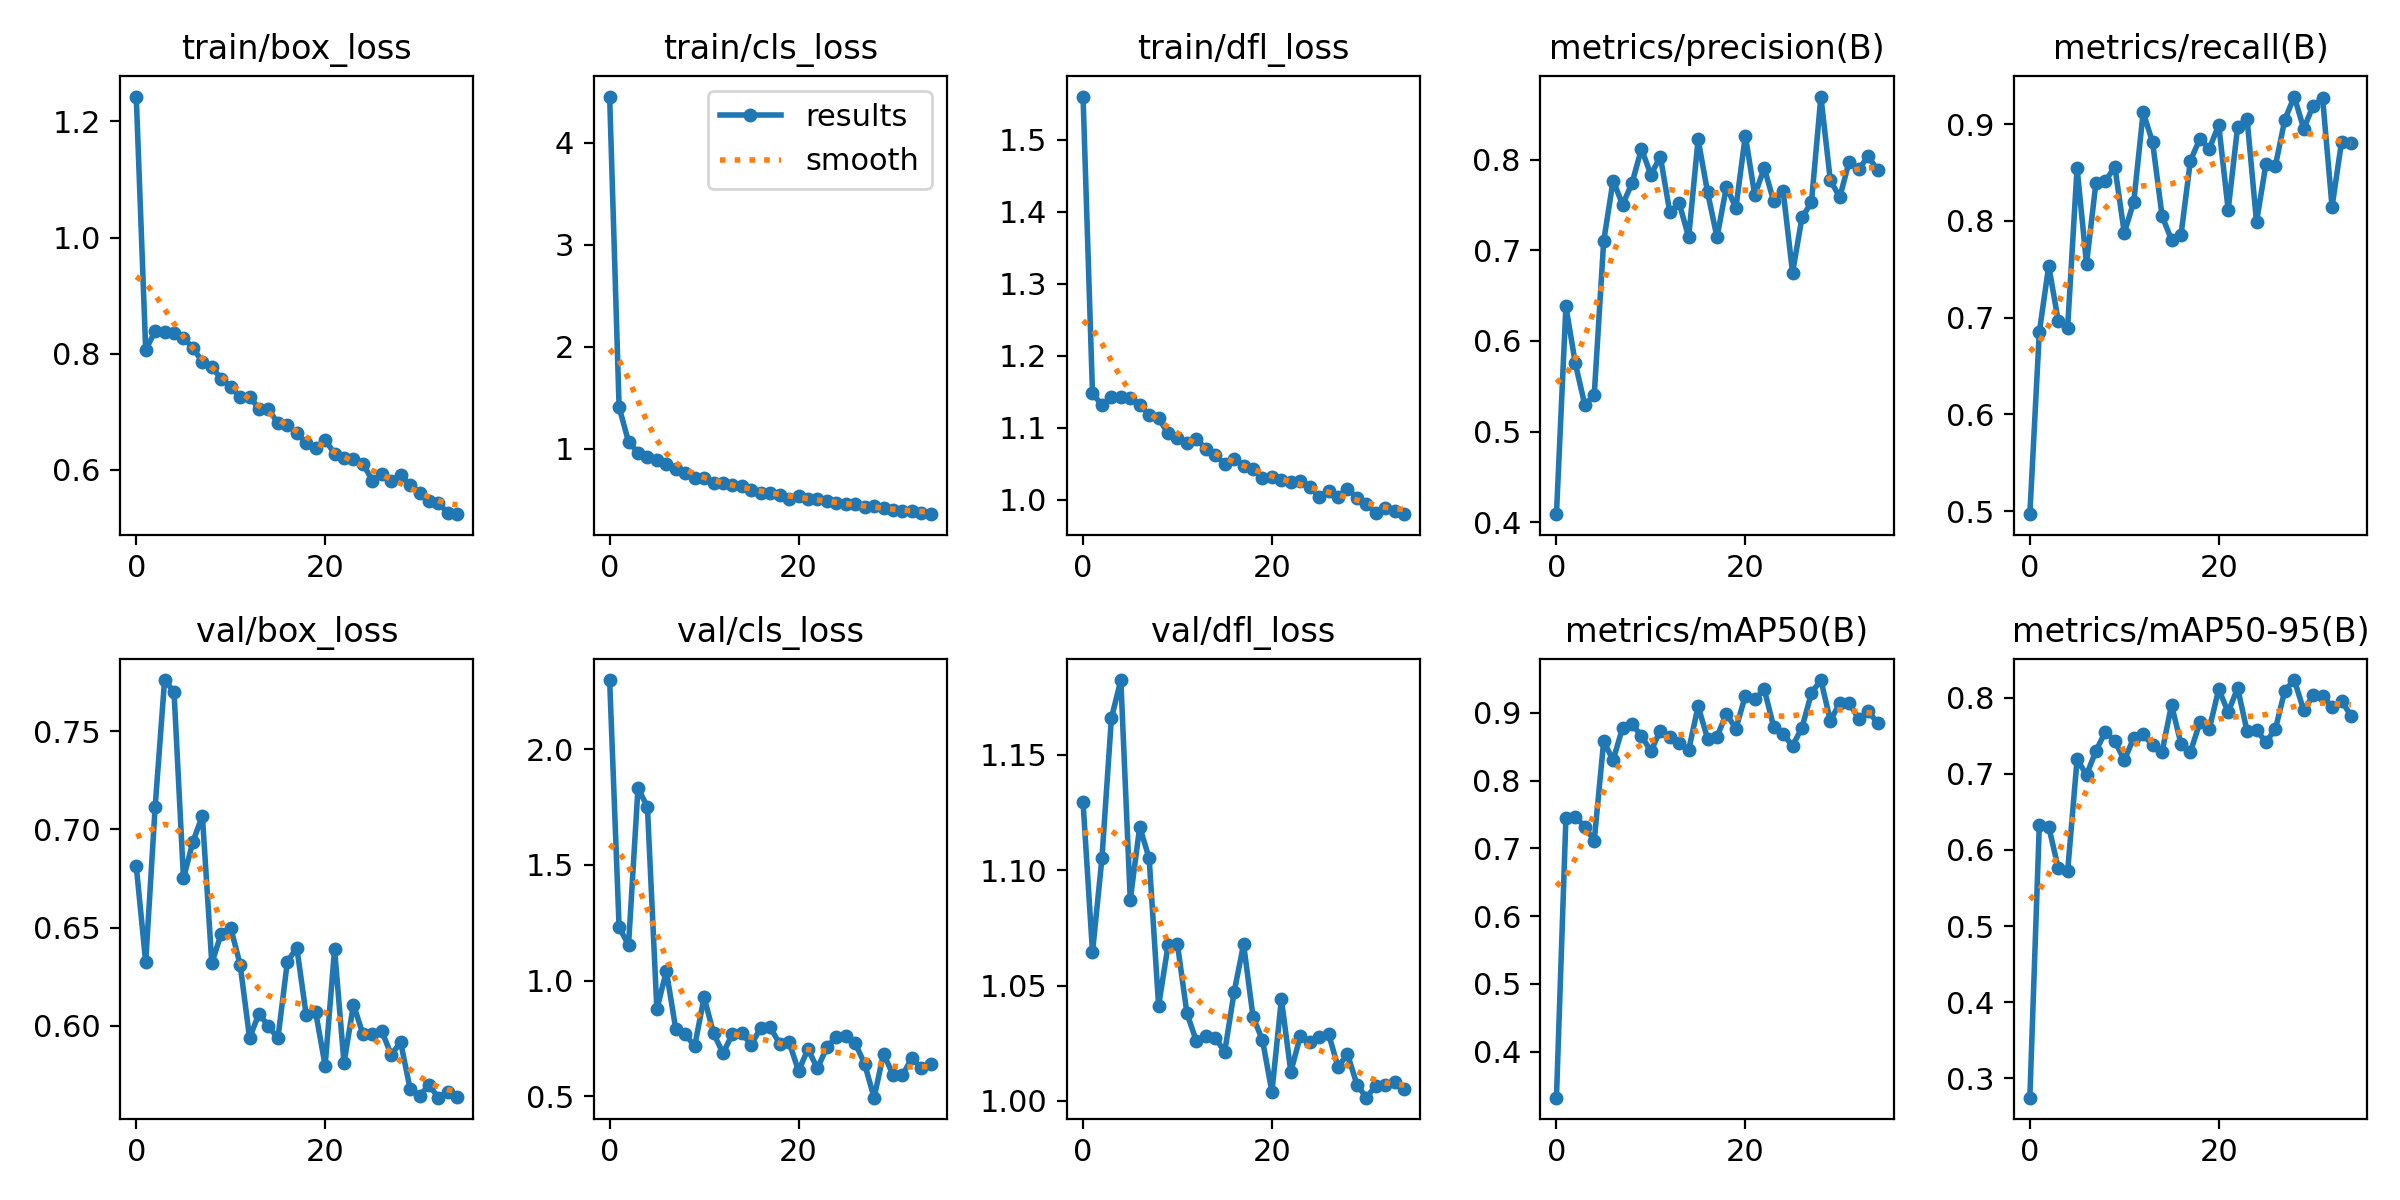

In [ ]:
Image(filename='runs/detect/train5/results.png', width=600)

**validation of model**

In [ ]:
!yolo task=detect mode=val model=runs/detect/train5/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients
val: Scanning /content/drive/.shortcut-targets-by-id/1Ot-5XMgHmo5HBtU84-tHwQn9RYyDZw-o/numeric_sign_detection/data/Val/labels.cache... 400 images, 0 backgrounds, 0 corrupt: 100% 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:08<00:00,  3.10it/s]
                   all        400        400       0.87      0.931      0.949      0.822
                Shunno        400         40          1      0.999      0.995      0.857
                   Eek        400         40      0.863      0.942      0.865      0.663
                   Dui        400         40      0.662       0.88      0.915      0.797
                  Tiin        400         40      0.849       0.75      0.882      0.761
                 Chaar        400         40      0.666      0.825    

In [ ]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 51.9MB/s]
val: Scanning /content/drive/MyDrive/numeric_sign_detection/data/Val/labels.cache... 400 images, 0 backgrounds, 0 corrupt: 100% 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:19<00:00,  1.31it/s]
                   all        400        400      0.771      0.867      0.911      0.802
                Shunno        400         40      0.952          1      0.995      0.883
                   Eek        400         40      0.673       0.36      0.759      0.637
                   Dui        400         40      0.427      0.634      0.741      0.641
                  Tiin        400         40      0.857      0.751      0.886      0.771
                 Chaar        400         40       0.54      0.925      0.875    

**Testing using model**

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train5/weights/best.pt conf=0.25 source=/content/drive/MyDrive/numeric_sign_detection/data/Test2

Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients

image 1/139 /content/drive/MyDrive/numeric_sign_detection/data/Test2/Sign 0 - Sample (1).jpg: 480x640 1 Shunno, 66.3ms
image 2/139 /content/drive/MyDrive/numeric_sign_detection/data/Test2/Sign 0 - Sample (2).jpg: 480x640 1 Shunno, 27.0ms
image 3/139 /content/drive/MyDrive/numeric_sign_detection/data/Test2/Sign 0 - Sample (3).jpg: 480x640 1 Shunno, 13.1ms
image 4/139 /content/drive/MyDrive/numeric_sign_detection/data/Test2/Sign 1 - Sample (107).jpg: 480x640 1 Eek, 13.1ms
image 5/139 /content/drive/MyDrive/numeric_sign_detection/data/Test2/Sign 1 - Sample (108).jpg: 480x640 (no detections), 13.0ms
image 6/139 /content/drive/MyDrive/numeric_sign_detection/data/Test2/Sign 1 - Sample (115).jpg: 480x640 (no detections), 13.1ms
image 7/139 /content/drive/MyDrive/numeric_sign_detection/data/Test2/Sign 1 - Sample (124).jpg: 480x640 (no dete

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train5/weights/best.pt conf=0.25 source=/content/drive/MyDrive/numeric_sign_detection/data/Test/images plots=True classes= [0,1,2,3,4,5,6,7,8,9]

Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients

image 1/200 /content/drive/MyDrive/numeric_sign_detection/data/Test/images/Sign 0 - Sample (51).jpg: 480x640 1 Shunno, 64.8ms
image 2/200 /content/drive/MyDrive/numeric_sign_detection/data/Test/images/Sign 0 - Sample (52).jpg: 480x640 1 Shunno, 13.1ms
image 3/200 /content/drive/MyDrive/numeric_sign_detection/data/Test/images/Sign 0 - Sample (53).jpg: 480x640 1 Shunno, 35.5ms
image 4/200 /content/drive/MyDrive/numeric_sign_detection/data/Test/images/Sign 0 - Sample (54).jpg: 480x640 1 Shunno, 13.2ms
image 5/200 /content/drive/MyDrive/numeric_sign_detection/data/Test/images/Sign 0 - Sample (55).jpg: 480x640 1 Shunno, 13.1ms
image 6/200 /content/drive/MyDrive/numeric_sign_detection/data/Test/images/Sign 0 - Sample (56).jpg: 480x640 1 Shunno, 13.1ms
image 7/200 /content/drive/MyDrive/numeric_sign_detection/data/Test/images/Sign 0 - Sam

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train5/weights/best.pt conf=0.25 source=/content/drive/MyDrive/numeric_sign_detection/data/Val/images plots=True

Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients

image 1/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (1).jpg: 480x640 1 Shunno, 67.1ms
image 2/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (11).jpg: 480x640 1 Shunno, 13.1ms
image 3/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (12).jpg: 480x640 1 Shunno, 13.1ms
image 4/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (13).jpg: 480x640 1 Shunno, 13.1ms
image 5/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (131).jpg: 480x640 1 Shunno, 46.1ms
image 6/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (132).jpg: 480x640 1 Shunno, 13.1ms
image 7/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (1

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train5/weights/best.pt conf=0.25 source=/content/drive/MyDrive/numeric_sign_detection/data/Val/images plots=True classes= [0,1,2,3,4,5,6,7,8,9] conf=0.5 iou=0.7 boxes=True show_labels=True show_conf=True




Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients

image 1/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (1).jpg: 480x640 1 Shunno, 71.9ms
image 2/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (11).jpg: 480x640 1 Shunno, 13.0ms
image 3/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (12).jpg: 480x640 1 Shunno, 13.0ms
image 4/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (13).jpg: 480x640 1 Shunno, 13.0ms
image 5/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (131).jpg: 480x640 1 Shunno, 34.9ms
image 6/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (132).jpg: 480x640 1 Shunno, 13.1ms
image 7/400 /content/drive/MyDrive/numeric_sign_detection/data/Val/images/Sign 0 - Sample (1

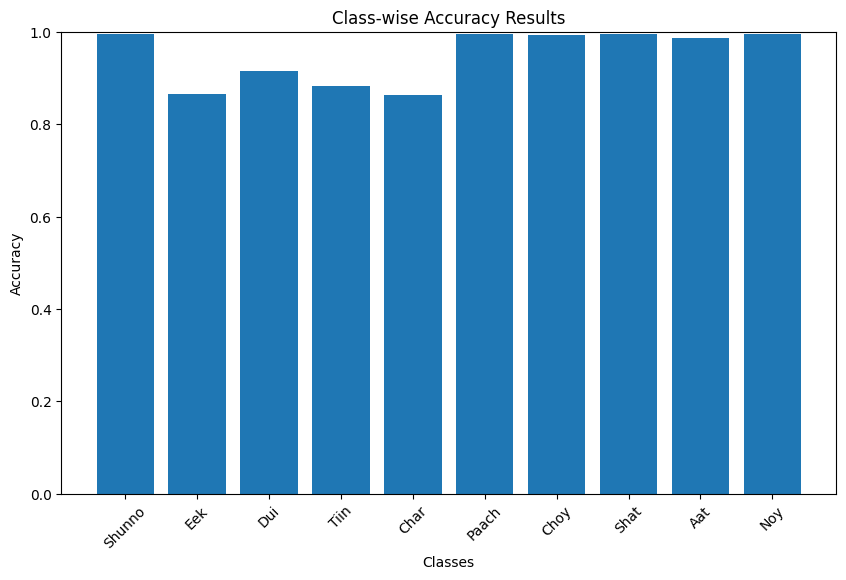

In [ ]:
import matplotlib.pyplot as plt

# Sample accuracy results (replace with your own data)
class_accuracy = {
    'Shunno': 0.995,
    'Eek': 0.865,
    'Dui': 0.915,
    'Tiin': 0.882,
    'Char': 0.864,
    'Paach': 0.995,
    'Choy': 0.994,
    'Shat': 0.995,
    'Aat': 0.987,
    'Noy': 0.995,
    # Add more classes and accuracy values as needed
}

# Extract class names and accuracy values
classes = list(class_accuracy.keys())
accuracy_values = list(class_accuracy.values())

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracy_values)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy Results')
plt.xticks(rotation=45)
plt.ylim([0, 1])  # Set the y-axis limits as needed
plt.show()

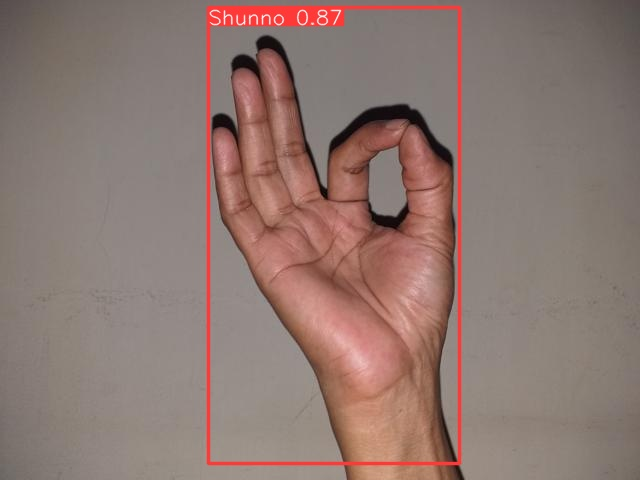

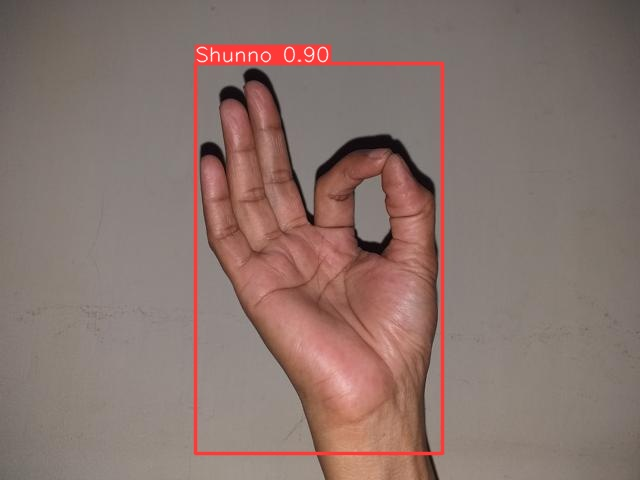

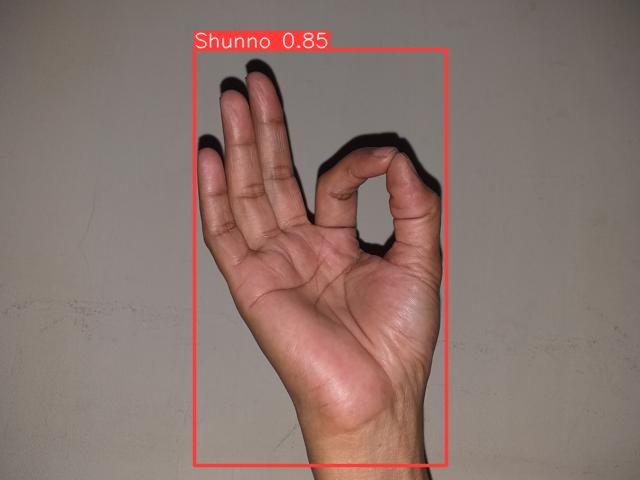

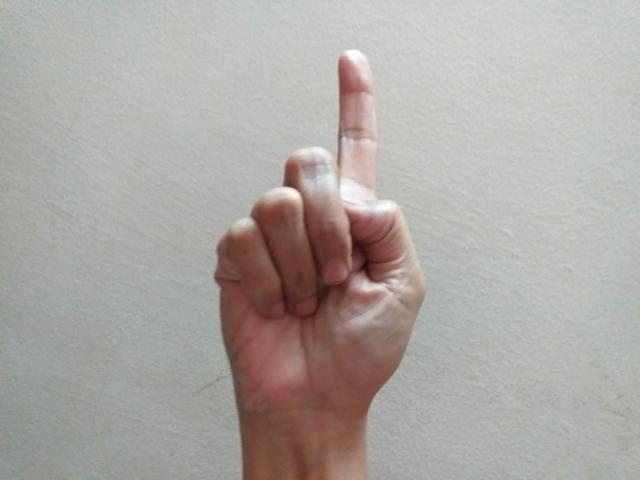

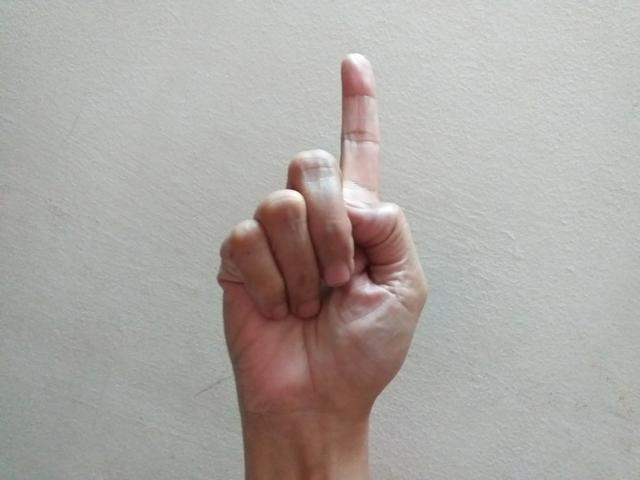

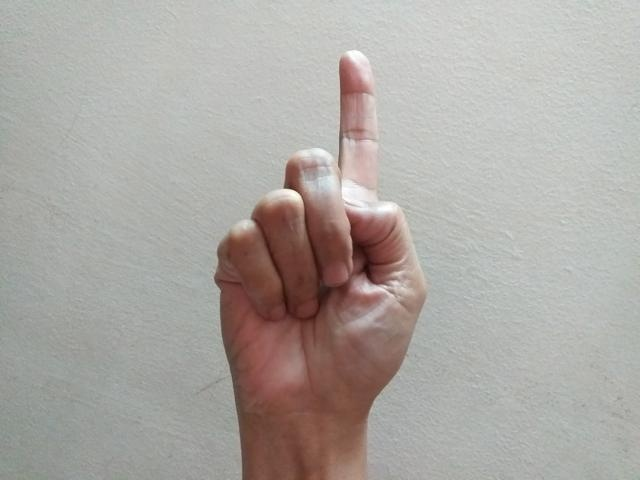

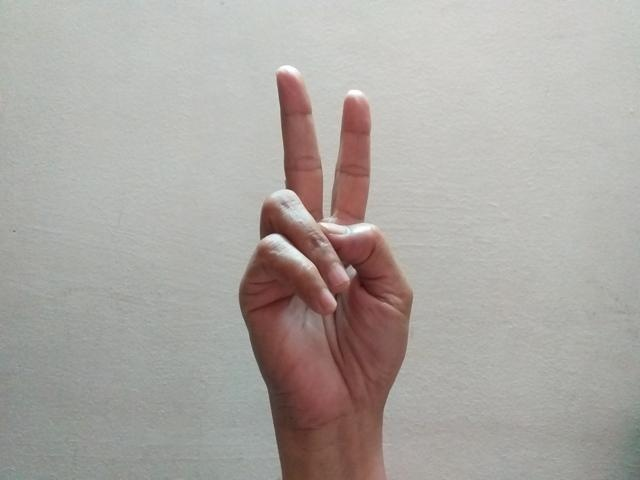

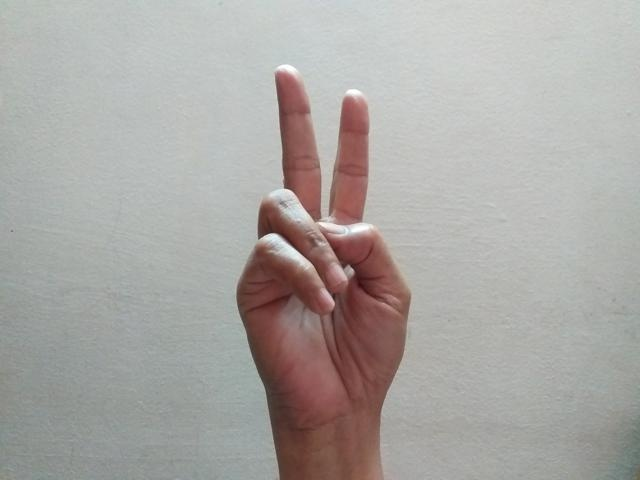

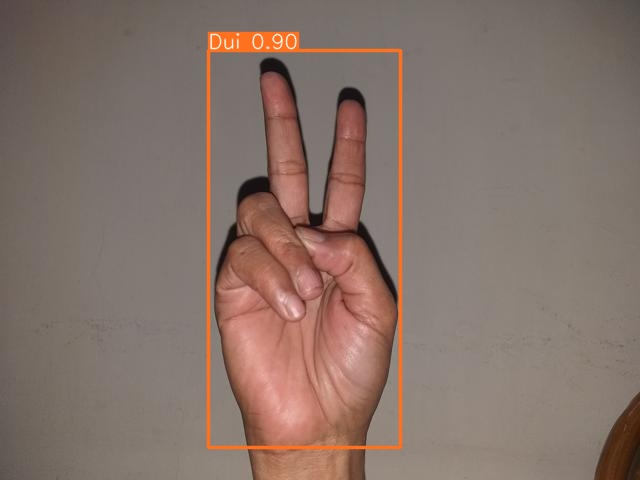

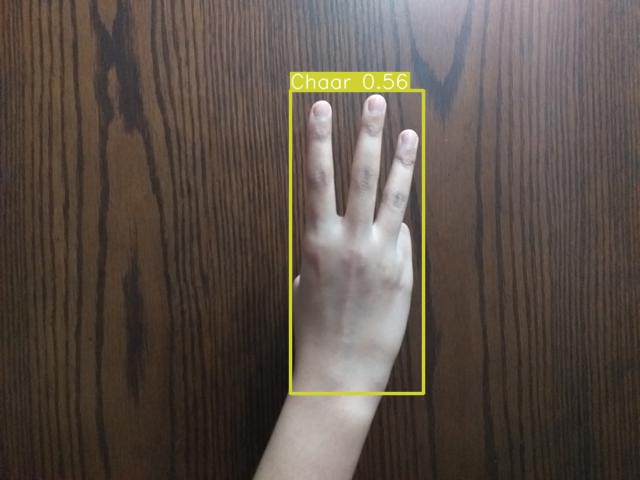

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")